<a href="https://colab.research.google.com/github/LucianPopaLVP/Deep-Learning-Project--Dog-Vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multi-class Dog Breed Classification

This notebook buils an end-to-end multi-class image classifier using Tensorflow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data used is from Kaggle's dog bread identification competition: https://www.kaggle.com/c/dog-breed-identification/overview

## 3. Evaluation

Multi-Class Log Loss: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

## 4. Features

Info about data:
* Dealing with images (unstructured data) so is probably best to use deep learning/transfer learning;
* There are 120 breeds of dogs (this means there are 120 different classes);
* There are ~ 10,000 + images in the training set(these images have labels) and ~ 10,000 images in the test set(no labels);

## Get my space ready

* Import TF 2.X ✅
* Import TF Hub ✅
* Make sure I am using a GPU ✅

In [42]:
# Import necessary tools
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

# Import TensorFlow and TensorFlow Hub into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSS!!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available!")

Mounted at /content/drive
TF version: 2.7.0
TF Hub version: 0.12.0
GPU available (YESSS!!!!!!!)


## Acces the data and getting it ready ( turning into tensors)

* With all ML lerning models, data has to be in numerical format. 

In [43]:
# Acces the data and checking the labels
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     b9ae33d10433281e7cf30ce09f61df37  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [44]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


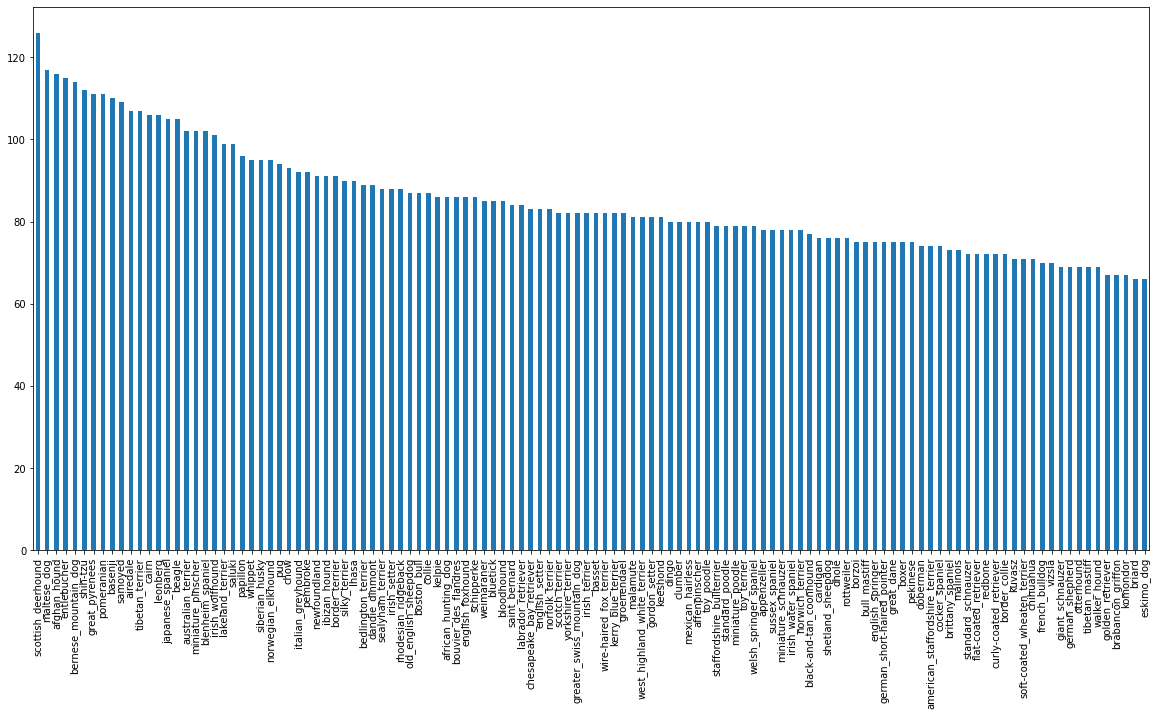

In [45]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [46]:
labels_csv["breed"].value_counts().median()

82.0

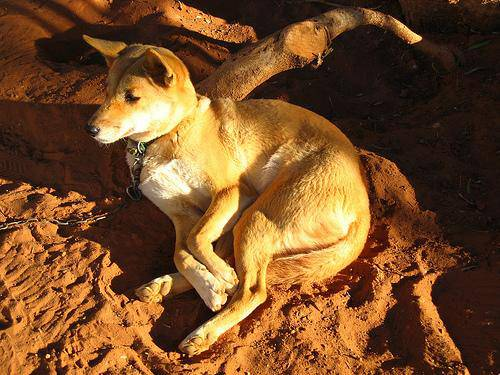

In [47]:
# View an image 
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Get a list of all of the images file pathnames.

In [48]:
# Create pathnames from image ID's
filenames = ["/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive

In [49]:
# Check if number of filenames matches the number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/")) == len(filenames):
  print("They are matching! Proceed!")
else:
  print("They don't match! Check the target directory.")

They are matching! Proceed!


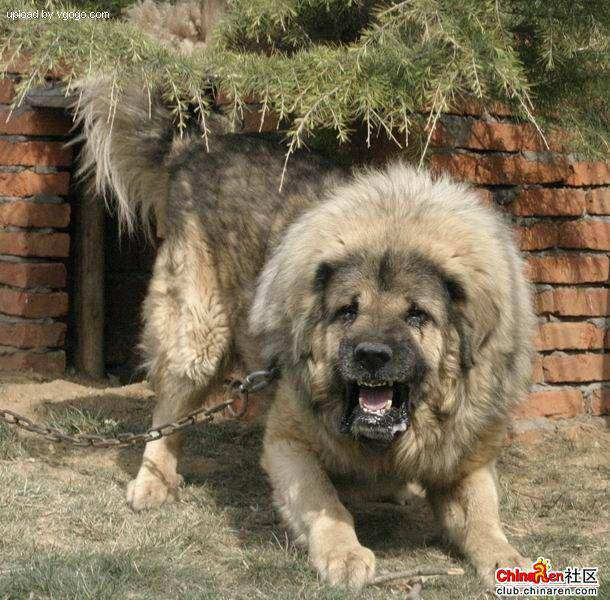

In [50]:
# Check
Image(filenames[9000])

In [51]:
labels_csv["breed"][9000]

'tibetan_mastiff'

# Prepare the labels

In [52]:
import numpy as np
labels = labels_csv["breed"] # or you can directly use `labels = labels_csv["breed"].to_numpy()`
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [53]:
len(labels)

10222

In [54]:
# Check if number of labels matches the number of filenames (to figure out if I have missing values)
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("No match! Check data directories.")

Number of labels matches number of filenames!


In [55]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [56]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [57]:
from numpy.ma.extras import unique
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [58]:
len(boolean_labels)

10222

In [59]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in bolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [60]:
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive

### Creating my own validation set

Since the dataset from Kaggle doesn't include a validation set, can create one to use.

In [61]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [62]:
len(filenames)

10222

#### Start off experimenting with ~ 1000 images and increase it as need it

In [63]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max: 10000, step:1000}

In [64]:
# Split the data into train and validation sets
from sklearn.model_selection import train_test_split

# Split into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [65]:
# Quick look at the training data
X_train[:2], y_train[:2]

(['/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, Fal

## Preprocessing Images ( turning images into Tensors)

To preprocess the images into Tensors gonna write a function which does a few things:
1. Take an image filepath as input;
2. Use TensorFlow to read the file and save it to a variable `image`;
3. Turn the `image` (jpg) into Tensors and normalize the data;
4. Resize the `image` to be a shape of (224, 224);
5. Return the modified `image`.




In [66]:
# Importing example
# Convert image to a NumPy
from matplotlib.pyplot import imread
image = imread(filenames[41])
image.shape
tf.constant(image) # turn image into tensor

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[ 63,  52,  24],
        [ 62,  51,  23],
        [ 60,  48,  22],
        ...,
        [ 60,  41,  26],
        [ 62,  43,  28],
        [ 63,  44,  29]],

       [[ 64,  53,  25],
        [ 63,  52,  24],
        [ 61,  49,  23],
        ...,
        [ 61,  42,  27],
        [ 62,  43,  28],
        [ 64,  45,  30]],

       [[ 65,  54,  26],
        [ 64,  53,  25],
        [ 62,  50,  24],
        ...,
        [ 62,  43,  28],
        [ 63,  44,  29],
        [ 64,  45,  30]],

       ...,

       [[ 13,   6,   0],
        [ 18,  11,   1],
        [ 26,  17,  10],
        ...,
        [193, 166,  79],
        [197, 170,  83],
        [199, 172,  85]],

       [[ 21,  14,   4],
        [ 21,  14,   4],
        [ 22,  13,   6],
        ...,
        [196, 168,  84],
        [201, 173,  89],
        [204, 176,  92]],

       [[ 25,  18,   8],
        [ 20,  13,   3],
        [ 18,   9,   2],
        ...,
        [201, 172,  9

# Make a function to preprocess images

In [67]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns it into a tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical Tensor  with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values(normalization)
  image = tf.cast(image, tf.float32) / 255.0 
  # Resize the image to the desired value (244, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

  

## Turning Data into batches ( 32 is the recommended value)

Why turn it into batches?

If trying to process 10,000+ images in one go, they might not fit into the memory. That's why is recommended to use batches and the value recommended is 32 but it can be adjusted manually.
In order to use TF effectively, need the data in the form of Tensor tuples likethis: (image, label)

In [68]:
# Create a simple function to return a tuple (iamge, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, processes the image and returns a tuple
  of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [69]:
# Example for the above function 
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.25371668, 0.4436649 , 0.24117757],
         [0.25699762, 0.44670868, 0.2389375 ],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.45378068, 0.27294815],
         [0.24375685, 0.44070187, 0.2554778 ],
         [0.2838985 , 0.4721338 , 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941193, 0.4069295 , 0.25792548],
         [0.24045376, 0.43900943, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.4841477 , 0.30125174],
         [0.27101526, 0.49454466, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

### Found a way to turn data into tuples of Tensors in the form of: `(image, label)`. Next, make a function to turn all the data (`X` and `y`) into batches.

In [70]:
# Define the batch size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (X) and label (y) pairs.
  Suffles the data if it's training data but doesn't shuffle if it's a validation data.
  Also accepts test data as input (no labels)
  """
  # If data is a test dataset, probably don't have labels
  if test_data:
    print("Creating test data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If data is a valid dataset, don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # turn file paths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch
    

In [71]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)


Creating training data batches...
Creating validation data batches...


In [72]:
# Create out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Vizualizing Data Batches

Data is now in batches, these can be a little hard to understand/comprehend, so it's helpful to visualize it.

In [73]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Diplays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # loop through 25 ( for diplaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # display an image
    plt.imshow(images[i])
    # Add the image label as title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [74]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.7493271 , 0.831584  , 0.8207904 ],
          [0.7655297 , 0.8478725 , 0.8154247 ],
          [0.8531003 , 0.93413496, 0.8821094 ],
          ...,
          [0.30246124, 0.20834358, 0.1926573 ],
          [0.437283  , 0.34316537, 0.3274791 ],
          [0.4190455 , 0.32492787, 0.3092416 ]],
 
         [[0.88551134, 0.9533685 , 0.9261437 ],
          [0.5265755 , 0.5917254 , 0.54112804],
          [0.6686677 , 0.7386168 , 0.65887773],
          ...,
          [0.3684737 , 0.27435607, 0.25866976],
          [0.40853122, 0.31441358, 0.2987273 ],
          [0.4575335 , 0.36341587, 0.3477296 ]],
 
         [[0.5393405 , 0.5749048 , 0.55301344],
          [0.49391398, 0.5358853 , 0.48268494],
          [0.4246232 , 0.47766066, 0.39448202],
          ...,
          [0.30899593, 0.21487828, 0.20703514],
          [0.46934018, 0.37522253, 0.3673794 ],
          [0.4448892 , 0.35077155, 0.3429284 ]],
 
         ...,
 
         [[0.30320805, 0.24908276, 0.16749704],
          [0.55817

In [75]:
len(train_images), len(train_labels)

(32, 32)

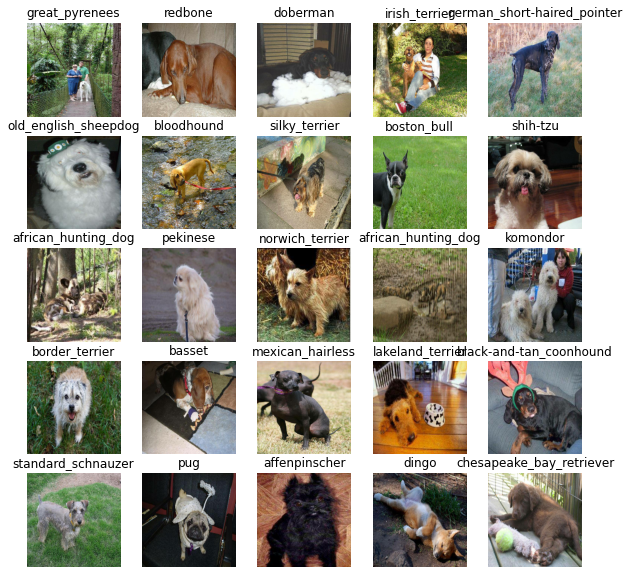

In [76]:
# Visualize data in a training batch
show_25_images(train_images, train_labels)